# Convert Models to ONNX

### Detection Model

In [2]:
import wandb
run = wandb.init()
artifact = run.use_artifact('olonok69/EyePacs_fine_tune/eyePacs_detection:v0', type='model')
artifact_dir = artifact.download()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\User\_netrc


wandb: Downloading large artifact eyePacs_detection:v0, 327.33MB. 4 files... 
wandb:   4 of 4 files downloaded.  
Done. 0:2:26.4


In [3]:
import torch
from transformers import ViTImageProcessor, ViTForImageClassification
import os
import sys
import platform
from PIL import Image

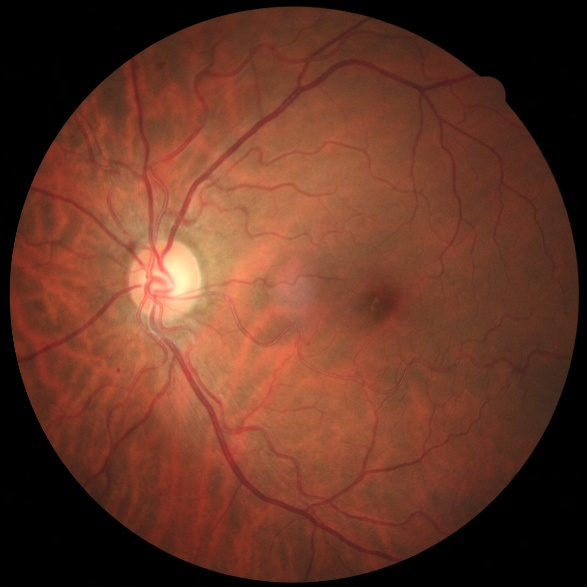

In [6]:
image_path = "dr/test/DR/10216_left.jpeg"
image = Image.open(image_path).convert("RGB")
image

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = ViTImageProcessor.from_pretrained(artifact_dir)
model = ViTForImageClassification.from_pretrained(artifact_dir)

In [8]:
processor

ViTImageProcessor {
  "do_normalize": false,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [9]:
inputs = processor(images=image, return_tensors="pt")

In [17]:
inputs

{'pixel_values': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000

In [18]:
torch.__version__

'2.2.2+cpu'

In [10]:
input_tensor = inputs["pixel_values"]


torch.onnx.export(
    model=model,
    args=(input_tensor,),
    f="models/onnx/retina_detection.onnx",
    opset_version=14,
    do_constant_folding=True,
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},
)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\transformers\models\vit\modeling_vit.py:163: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if num_channels != self.num_channels:
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\transformers\models\vit\modeling_vit.py:169: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if height != self.image_size[0] or width != self.image_size[1]:


### Quality Model

In [11]:

artifact = run.use_artifact('olonok69/EyePacs_fine_tune/eyePacs_quality:v2', type='model')
artifact_dir = artifact.download()

wandb: Downloading large artifact eyePacs_quality:v2, 327.33MB. 4 files... 
wandb:   4 of 4 files downloaded.  
Done. 0:0:12.0


In [16]:
artifact_dir

'F:\\repos\\test_retina\\artifacts\\eyePacs_quality-v2'

In [12]:
processor = ViTImageProcessor.from_pretrained(artifact_dir)
model = ViTForImageClassification.from_pretrained(artifact_dir)

In [13]:
inputs = processor(images=image, return_tensors="pt")

In [15]:
input_tensor = inputs["pixel_values"]


torch.onnx.export(
    model=model,
    args=(input_tensor,),
    f="models/onnx/retina_quality.onnx",
    opset_version=14,
    do_constant_folding=True,
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},
)